In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices ##可根据离散变量生成哑变量
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
## count sales categories
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [5]:
## count salary categories
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [6]:
df.left = df.left.astype(int) ## ?

In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

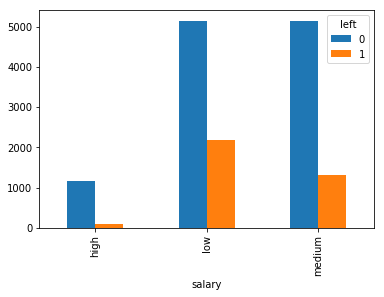

In [8]:
#观察离职人数与工资分布的关系
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [9]:
#观察离职比例与工资分布的关系
q = pd.crosstab(df.salary, df.left)
print(q)

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


In [10]:
print(q.sum(1))

salary
high      1237
low       7316
medium    6446
dtype: int64


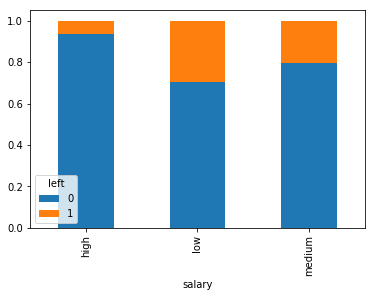

In [11]:
##0 don't want to leave, 1 wants to leave
q.div(q.sum(1), axis=0).plot(kind='bar', stacked='True')
plt.show()

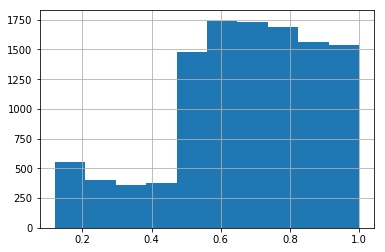

In [12]:
#观察员工满意度的分布图(histogram)， left为0的时候满意度分布
df[df.left==0].satisfaction_level.hist()
plt.show()

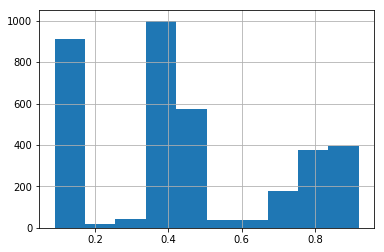

In [13]:
#left为1的时候满意度分布
df[df.left==1].satisfaction_level.hist()

In [14]:
#dmatrices将数据中的离散变量变成哑变量，并指明用satisfaction_level, last_evaluation, ... 来预测left
model= LogisticRegression()
## y is left value, awesome!!!
y,X=dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', df, return_type='dataframe')

In [15]:
##把IT和salary--high吸入进去
X=X.rename(columns={
   'C(sales)[T.RandD]':'Department : Random',
   'C(sales)[T.accounting]':'Department : Accounting',
   'C(sales)[T.hr]':'Department : HR',
   'C(sales)[T.management]':'Department : Management',
   'C(sales)[T.marketing]':'Department : Marketing',
   'C(sales)[T.product_mng]':'Department : product_management',
   'C(sales)[T.sales]':'Department : Sales',
   'C(sales)[T.support]':'Department : Support',
   'C(sales)[T.technical]':'Department : Technical',
   'C(salary)[T.low]':'Salary : Low',
   'C(salary)[T.medium]':'Salary : Medium'
})
y = np.ravel(y)

In [16]:
print(y)

[1. 1. 1. ... 1. 1. 1.]


In [17]:
print(X)

       Intercept  Department : Random  Department : Accounting  \
0            1.0                  0.0                      0.0   
1            1.0                  0.0                      0.0   
2            1.0                  0.0                      0.0   
3            1.0                  0.0                      0.0   
4            1.0                  0.0                      0.0   
5            1.0                  0.0                      0.0   
6            1.0                  0.0                      0.0   
7            1.0                  0.0                      0.0   
8            1.0                  0.0                      0.0   
9            1.0                  0.0                      0.0   
10           1.0                  0.0                      0.0   
11           1.0                  0.0                      0.0   
12           1.0                  0.0                      0.0   
13           1.0                  0.0                      0.0   
14        

In [18]:
#用X和y训练模型，然后输出X中每一项自变量对于y的影响 zip(a,b)可将a的每一个元素和b里对应位置的元素组成一对
## 所有data拿来train
model.fit(X,y)
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))) ## DataFrame Camel-Case

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,Intercept,[-0.6868217375039909]
1,Department : Random,[-0.48976296483354]
2,Department : Accounting,[0.0953925582238493]
3,Department : HR,[0.32867149592011496]
4,Department : Management,[-0.4010970141309813]
5,Department : Marketing,[0.08974406449725568]
6,Department : product_management,[-0.040952963291158016]
7,Department : Sales,[0.07497090952330053]
8,Department : Support,[0.16836018458961563]
9,Department : Technical,[0.17302139333033595]


In [19]:
print(model.score(X,y))
model.coef_

0.793652910194013


array([[-0.68682174, -0.48976296,  0.09539256,  0.3286715 , -0.40109701,
         0.08974406, -0.04095296,  0.07497091,  0.16836018,  0.17302139,
         1.7821034 ,  1.25625653, -4.12823731,  0.73314201, -0.31413789,
         0.00424471,  0.26068841, -1.52308122, -1.08784292]])

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 19 columns):
Intercept                          14999 non-null float64
Department : Random                14999 non-null float64
Department : Accounting            14999 non-null float64
Department : HR                    14999 non-null float64
Department : Management            14999 non-null float64
Department : Marketing             14999 non-null float64
Department : product_management    14999 non-null float64
Department : Sales                 14999 non-null float64
Department : Support               14999 non-null float64
Department : Technical             14999 non-null float64
Salary : Low                       14999 non-null float64
Salary : Medium                    14999 non-null float64
satisfaction_level                 14999 non-null float64
last_evaluation                    14999 non-null float64
number_project                     14999 non-null float64
average_montly_hours 

In [21]:
#预测这样一个人的离职概率： 一个高工资HR， 对公司满意度0.5, 上次评审0.7分， 做过4个项目， 每月平均工作160小时， 在公司呆了3年， 过去5年没有被晋升， 没有工伤
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0,0.5,0.7,4,160,3.0,0,0]])

array([[0.91615561, 0.08384439]])

In [22]:
##Accuracy formula
model.predict_proba(X)
pred= model.predict(X)
1-(abs(pred-y)).sum()/len(y)

0.793652910194013

In [23]:
#生成7:3的训练测试集
Xtrain, Xtest, ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(Xtrain,ytrain)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
## model2 accuracy score looks much better
model2 = LogisticRegression(C=10000)
model2.fit(Xtrain, ytrain)
pred = model2.predict(Xtest)
metrics.accuracy_score(ytest, pred)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.787

In [25]:
metrics.confusion_matrix(ytest, pred)

array([[2133,  166],
       [ 473,  228]])

In [26]:
## print final report
print(metrics.classification_report(ytest, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2299
         1.0       0.58      0.33      0.42       701

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



In [27]:
## Cross Validation * 10
print(cross_val_score(LogisticRegression(), X,y, scoring='accuracy', cv=20))

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

[0.80426099 0.81358189 0.79494008 0.78828229 0.79494008 0.79094541
 0.78561917 0.78828229 0.79466667 0.808      0.81066667 0.79706275
 0.79038718 0.79439252 0.7917223  0.79439252 0.73965287 0.77970628
 0.76902537 0.72897196]


In [28]:
print(cross_val_score(LogisticRegression(), X,y, scoring='accuracy', cv=20).mean()) ## The score drops a little bit

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.7877084749780295


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
